In [1]:
import matplotlib.pyplot as plt
import rebound
import numpy as np
import time
import random 

In [2]:
x1 = random.random()
x2 = random.random()

In [3]:
def mutual_inc(inc1,inc2,O1,O2):
    x = np.sin(inc1)*np.sin(inc2)*np.cos(O1-O2)
    x += np.cos(inc1)*np.cos(inc2)
    return np.arccos(x)

In [4]:
def eal_ias15():
    
    #SET UP WITH AUTOMATIC TIMESTEPING
    sim = rebound.Simulation()
    sim.integrator = "ias15"
    tmax = 1.9e4*2
        
    #SYETEM
    sim.add(m=1.) #STAR
    sim.add(m=1.,a=1., omega = x1) #PLANET
    sim.add(m=1.,a=10.,inc=89.9, omega = x2 ) #PERTUBER

    #INITAL MEASUREMENTS
    sim.move_to_com()
    e0 = sim.particles[1].e


    #FINAL MEASUREMENTS
    t = []
    t.append(0)
    
    ecc = []
    ecc.append(e0)
    inc = []
    inc.append(mutual_inc(sim.particles[1].inc,sim.particles[2].inc,sim.particles[1].Omega,sim.particles[2].Omega))
    print(sim.particles[1].inc, "IAS15")
    for time in np.arange(0,tmax,0.01): 
        sim.integrate(int(time), exact_finish_time=0)
        ecc.append(sim.particles[1].e)
        inc.append(mutual_inc(sim.particles[1].inc,sim.particles[2].inc,sim.particles[1].Omega,sim.particles[2].Omega))
        t.append(time)

  
    return t,ecc,inc

In [5]:
def eal_whfast():
    
    #SET UP WITH AUTOMATIC TIMESTEPING
    sim = rebound.Simulation()
    sim.integrator = "whfast"
    sim.ri_whfast.corrector = 17
    sim.ri_whfast.safe_mode = 0
    sim.dt = 1e-4
    tmax = 1.9e4*2
        
    #SYETEM
    sim.add(m=1.) #STAR
    sim.add(m=1.,a=1., omega = x1) #PLANET
    sim.add(m=1.,a=10.,inc=89.9, omega = x2 ) #PERTUBER

    #INITAL MEASUREMENTS
    sim.move_to_com()
    e0 = sim.particles[1].e



    #FINAL MEASUREMENTS
    t = []
    t.append(0)
    
    ecc = []
    ecc.append(e0)
    inc = []
    inc.append(mutual_inc(sim.particles[1].inc,sim.particles[2].inc,sim.particles[1].Omega,sim.particles[2].Omega))
    print(sim.particles[1].inc, "WHFAST")
    for time in np.arange(0,tmax,0.01): 
        sim.integrate(int(time), exact_finish_time=0)
        ecc.append(sim.particles[1].e)
        inc.append(mutual_inc(sim.particles[1].inc,sim.particles[2].inc,sim.particles[1].Omega,sim.particles[2].Omega))
        t.append(time)
        
        
    return t,ecc,inc

In [6]:
def eal_leapfrog():
    
    #SET UP WITH AUTOMATIC TIMESTEPING
    sim = rebound.Simulation()
    sim.integrator = "leapfrog"
    sim.dt = 1e-3
    tmax = 1.9e4*2
        
    #SYETEM
    sim.add(m=1.) #STAR
    sim.add(m=1.,a=1., omega = x1) #PLANET
    sim.add(m=1.,a=10.,inc=89.9, omega = x2) #PERTUBER

    #INITAL MEASUREMENTS
    sim.move_to_com()
    e0 = sim.particles[1].e



    #FINAL MEASUREMENTS
    t = []
    t.append(0)
    
    ecc = []
    ecc.append(e0)
    inc = []
    inc.append(mutual_inc(sim.particles[1].inc,sim.particles[2].inc,sim.particles[1].Omega,sim.particles[2].Omega))
    print(sim.particles[1].inc, "Leapfrog")
    for time in np.arange(0,tmax,0.01): 
        sim.integrate(int(time), exact_finish_time=0)
        ecc.append(sim.particles[1].e)
        inc.append(mutual_inc(sim.particles[1].inc,sim.particles[2].inc,sim.particles[1].Omega,sim.particles[2].Omega))
        t.append(time)
        

        
    return t,ecc,inc

In [7]:
def eal_janus():
    
    #SET UP WITH AUTOMATIC TIMESTEPING
    sim = rebound.Simulation()
    sim.integrator = "janus"
    sim.dt = 1e-3
    tmax = 1.9e4*2
        
    #SYETEM
    sim.add(m=1.) #STAR
    sim.add(m=1.,a=1., omega = x1) #PLANET
    sim.add(m=1.,a=10.,inc=89.9, omega = x2 ) #PERTUBER

    #INITAL MEASUREMENTS
    sim.move_to_com()
    e0 = sim.particles[1].e



    #FINAL MEASUREMENTS
    t = []
    t.append(0)
    
    ecc = []
    ecc.append(e0)
    inc = []
    inc.append(mutual_inc(sim.particles[1].inc,sim.particles[2].inc,sim.particles[1].Omega,sim.particles[2].Omega))
    print(sim.particles[1].inc, "janus")
    for time in np.arange(0,tmax,0.01): 
        sim.integrate(int(time), exact_finish_time=0)
        ecc.append(sim.particles[1].e)
        inc.append(mutual_inc(sim.particles[1].inc,sim.particles[2].inc,sim.particles[1].Omega,sim.particles[2].Omega))
        t.append(time)

        
    return t,ecc,inc

In [8]:
def eal_saba():
    
    #SET UP WITH AUTOMATIC TIMESTEPING
    sim = rebound.Simulation()
    sim.integrator = "SABA(10,6,4)"
    sim.ri_saba.safe_mode = 0
    sim.dt = 1e-3
    tmax = 1.9e4*2
    
    #SYETEM
    sim.add(m=1.) #STAR
    sim.add(m=1.,a=1., omega = x1) #PLANET
    sim.add(m=1.,a=10.,inc=89.9, omega = x2 ) #PERTUBER
        
    #INITAL MEASUREMENTS
    sim.move_to_com()
    e0 = sim.particles[1].e


    #FINAL MEASUREMENTS
    t = []
    t.append(0)
    
    ecc = []
    ecc.append(e0)
    inc = []
    inc.append(mutual_inc(sim.particles[1].inc,sim.particles[2].inc,sim.particles[1].Omega,sim.particles[2].Omega))
    print(sim.particles[1].inc, "saba")
    for time in np.arange(0,tmax,0.01): 
        sim.integrate(int(time), exact_finish_time=0)
        ecc.append(sim.particles[1].e)
        inc.append(mutual_inc(sim.particles[1].inc,sim.particles[2].inc,sim.particles[1].Omega,sim.particles[2].Omega))
        t.append(time)
        
        
        
    return t,ecc,inc

In [9]:
def eal_eos():
    
    #SET UP WITH AUTOMATIC TIMESTEPING
    sim = rebound.Simulation()
    sim.integrator = "eos"
    sim.ri_eos.phi0 = "LF4"
    sim.ri_eos.phi1 = "LF4"
    sim.ri_eos.n = 2 
    sim.ri_eos.safe_mode = 0
    sim.dt = 1e-3
    tmax = 1.9e4*2
        
    #SYETEM
    sim.add(m=1.) #STAR
    sim.add(m=1.,a=1., omega = x1) #PLANET
    sim.add(m=1.,a=10.,inc=89.9, omega = x2 ) #PERTUBER

    
    #INITAL MEASUREMENTS
    sim.move_to_com()
    e0 = sim.particles[1].e



    #FINAL MEASUREMENTS
    t = []
    t.append(0)
    
    ecc = []
    ecc.append(e0)
    inc = []
    inc.append(mutual_inc(sim.particles[1].inc,sim.particles[2].inc,sim.particles[1].Omega,sim.particles[2].Omega))
    print(sim.particles[1].inc, "EOS")
    for time in np.arange(0,tmax,0.01): 
        sim.integrate(int(time), exact_finish_time=0)
        ecc.append(sim.particles[1].e)
        inc.append(mutual_inc(sim.particles[1].inc,sim.particles[2].inc,sim.particles[1].Omega,sim.particles[2].Omega))
        t.append(time)

        
    return t,ecc,inc

In [10]:
t1,ecc1,inc1 = eal_ias15()
t2,ecc2,inc2 = eal_whfast()
t3,ecc3,inc3 = eal_leapfrog()
t4,ecc4,inc4 = eal_janus()
t5,ecc5,inc5 = eal_saba()
t6,ecc6,inc6 = eal_eos()

0.0 IAS15
0.0 WHFAST
0.0 Leapfrog
0.0 janus
0.0 saba
0.0 EOS


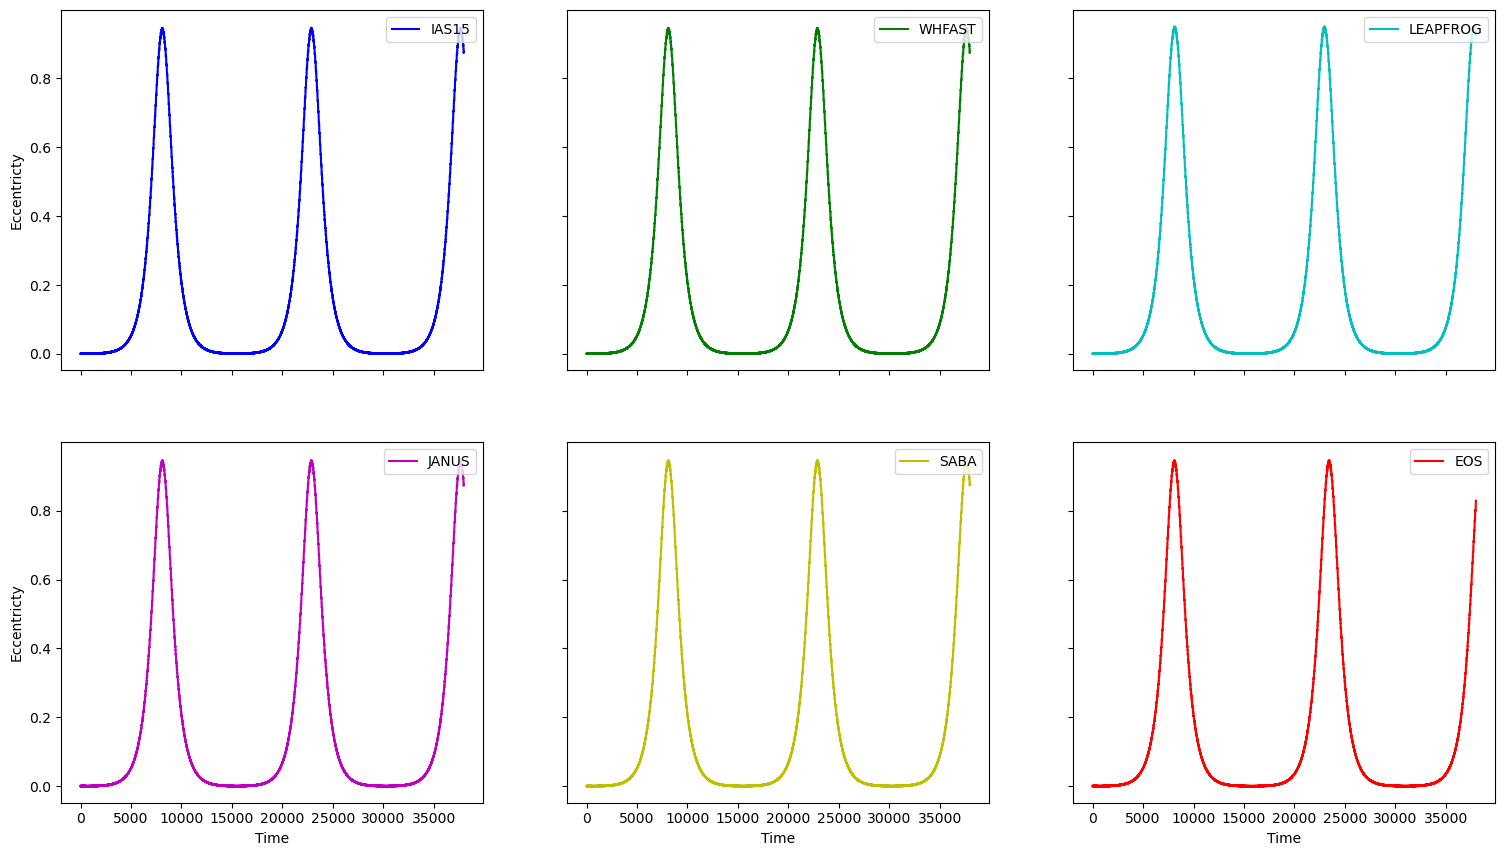

In [23]:
#PLOT ECCENTRICITY 
fig, axs = plt.subplots(2, 3, sharex=True, sharey=True)
axs[0,0].plot(t1,ecc1,"b", label = "IAS15")
axs[0,0].legend(loc='upper right')
axs[0,1].plot(t2,ecc2,"g", label = "WHFAST")
axs[0,1].legend(loc='upper right')
axs[0,2].plot(t3,ecc3,"c", label = "LEAPFROG")
axs[0,2].legend(loc='upper right')
axs[1,0].plot(t4,ecc4, "m", label = "JANUS")
axs[1,0].legend(loc='upper right')
axs[1,1].plot(t5,ecc5, "y", label = "SABA")
axs[1,1].legend(loc='upper right')
axs[1,2].plot(t6,ecc6, "r", label = "EOS")
axs[1,2].legend(loc='upper right')
#fig.suptitle("Hot Jupiter's Time Evolution of Eccentricity")

for ax in axs.flat:
    ax.set(xlabel='Time', ylabel='Eccentricty')
    
for ax in axs.flat:
    ax.label_outer()
    
fig.set_size_inches(18.5, 10.5)
fig.set_dpi(100)

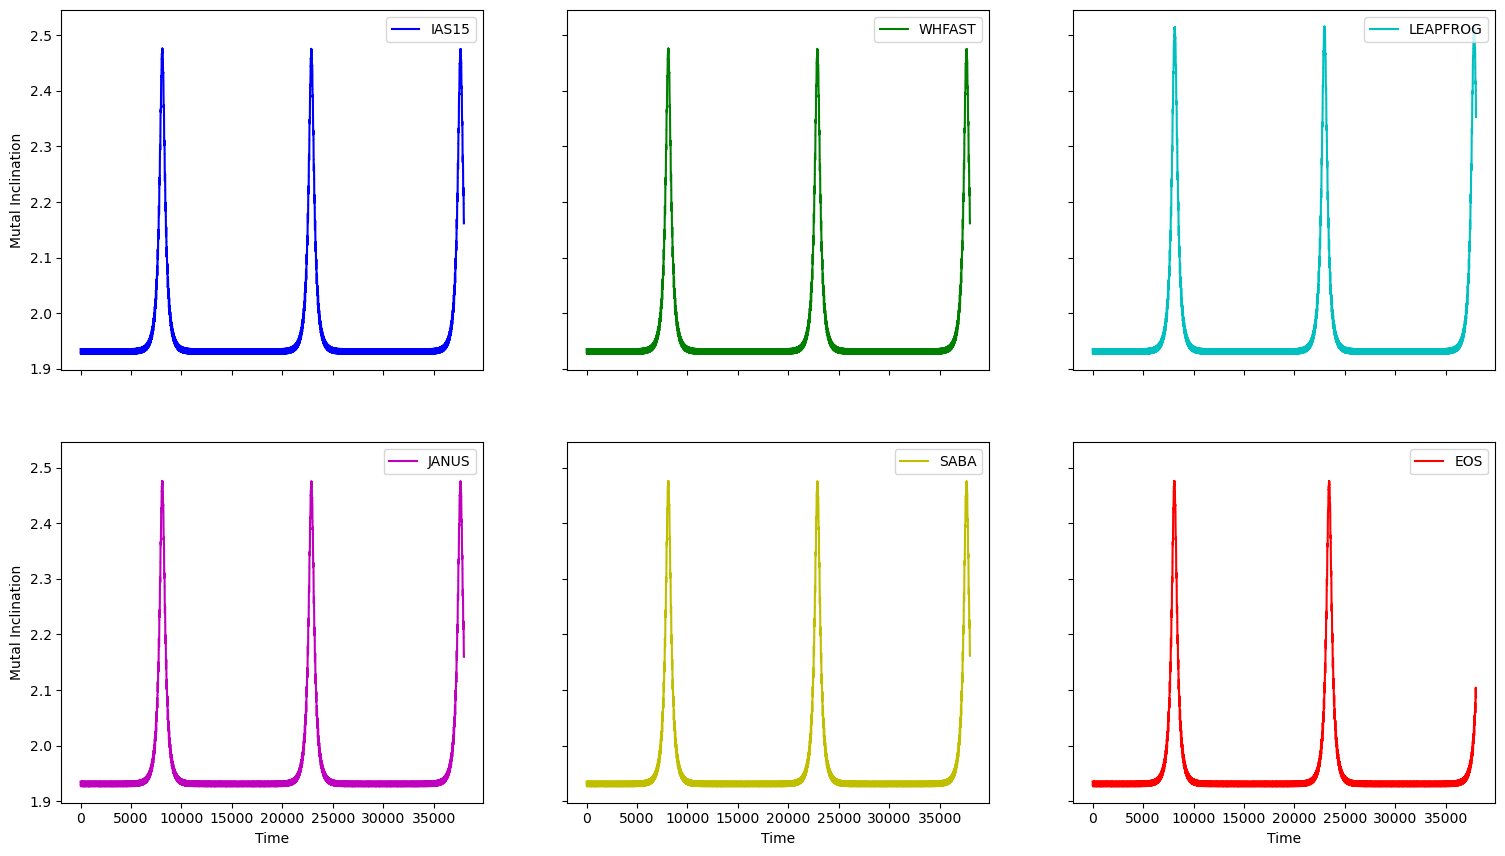

In [24]:
fig, axs = plt.subplots(2, 3, sharex=True, sharey=True)
axs[0,0].plot(t1,inc1,"b", label = "IAS15")
axs[0,0].legend(loc='upper right')
axs[0,1].plot(t2,inc2,"g", label = "WHFAST")
axs[0,1].legend(loc='upper right')
axs[0,2].plot(t3,inc3,"c", label = "LEAPFROG")
axs[0,2].legend(loc='upper right')
axs[1,0].plot(t4,inc4, "m", label = "JANUS")
axs[1,0].legend(loc='upper right')
axs[1,1].plot(t5,inc5, "y", label = "SABA")
axs[1,1].legend(loc='upper right')
axs[1,2].plot(t6,inc6, "r", label = "EOS")
axs[1,2].legend(loc='upper right')
#fig.suptitle("Hot Jupiter's Time Evolution of Mutal inclination")

for ax in axs.flat:
    ax.set(xlabel='Time', ylabel='Mutal Inclination')
    
for ax in axs.flat:
    ax.label_outer()
    
fig.set_size_inches(18.5, 10.5)
fig.set_dpi(100)

In [22]:
sim = rebound.Simulation()
sim.add(m=1.) #STAR
sim.add(m=1.,a=1., omega = x1) #PLANET
sim.add(m=1.,a=10.,inc=89.9, omega = x2) #PERTUBER

print(sim.particles[2].inc, 'i_{0}')
print(ecc1[-1]-ecc1[0],"isa15")
print(ecc2[-1]-ecc2[0],"whfast")
print(ecc3[-1]-ecc3[0],"leapfrog")
print(ecc4[-1]-ecc4[0],"janus")
print(ecc5[-1]-ecc5[0],"saba")
print(ecc6[-1]-ecc6[0],"eos")

1.9354056994857949 i_{0}
0.8775693955240417 isa15
0.8775697652030264 whfast
0.9264656162250708 leapfrog
0.876718817945885 janus
0.8775719080293894 saba
0.8286911018932559 eos
